In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
x, y = make_classification(n_samples=2000, n_classes=2, random_state=42)

feature_names = np.array([f"feature_{i}" for i in range(x.shape[1])])

**Recursive Feature Elimination**

In [10]:
estimator = LogisticRegression(random_state=42, max_iter=1000)

selector = RFE(estimator, n_features_to_select=5, step=1)
x_selected = selector.fit_transform(x, y)

feature_names = np.array([f"feature_{i}" for i in range(x.shape[1])])

print("RFE Selected features:")
print(feature_names[selector.get_support()])

RFE Selected features:
['feature_1' 'feature_4' 'feature_9' 'feature_11' 'feature_17']


In [11]:
print(f"\nFeature rankings (1 = selected):")
for i, (name, rank) in enumerate(zip(feature_names, selector.ranking_)):
    print(f"  {name}: {rank}")


Feature rankings (1 = selected):
  feature_0: 11
  feature_1: 1
  feature_2: 12
  feature_3: 8
  feature_4: 1
  feature_5: 7
  feature_6: 4
  feature_7: 5
  feature_8: 16
  feature_9: 1
  feature_10: 6
  feature_11: 1
  feature_12: 13
  feature_13: 9
  feature_14: 3
  feature_15: 2
  feature_16: 10
  feature_17: 1
  feature_18: 15
  feature_19: 14


- RFE with Cross-Validation (finds optimal number of features)

In [12]:
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
rfecv.fit(x, y)

print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"Selected features: {feature_names[rfecv.support_]}")


Optimal number of features: 3
Selected features: ['feature_1' 'feature_4' 'feature_9']


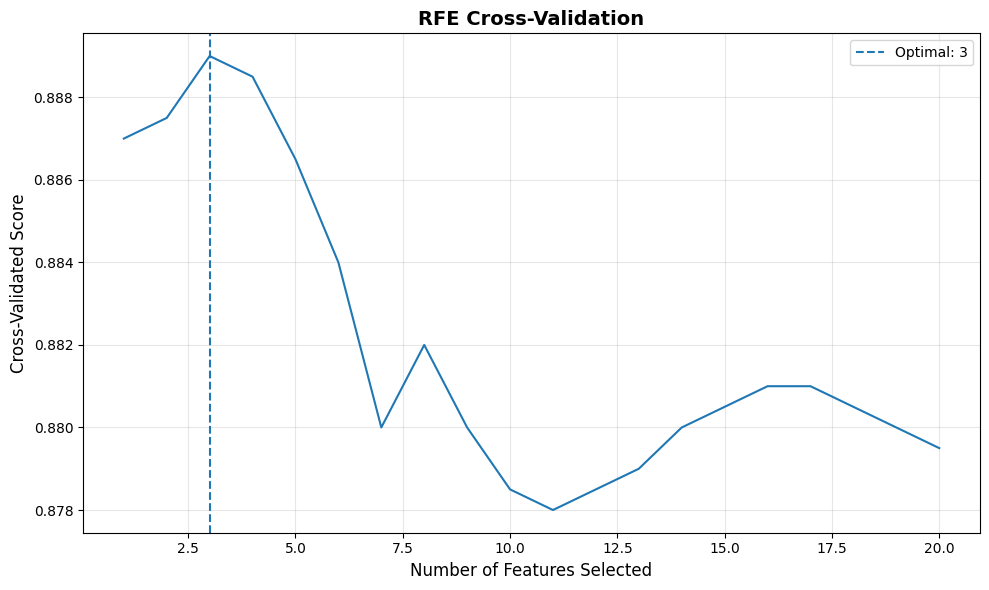

In [17]:
scores = rfecv.cv_results_["mean_test_score"]
x = np.arange(1, len(scores) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x, scores)
plt.xlabel("Number of Features Selected", fontsize=12)
plt.ylabel("Cross-Validated Score", fontsize=12)
plt.title("RFE Cross-Validation", fontsize=14, fontweight="bold")
plt.axvline(rfecv.n_features_, linestyle="--", label=f"Optimal: {rfecv.n_features_}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Forward Selection**

In [3]:
sfs_forward = SequentialFeatureSelector(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=5,
    direction='forward',
    cv=5,
    n_jobs=-1
)
sfs_forward.fit(x, y)

print("Forward Selection features:")
print(feature_names[sfs_forward.get_support()])

Forward Selection features:
['feature_0' 'feature_2' 'feature_8' 'feature_9' 'feature_13']


**Backward elimination**

In [4]:
sfs_backward = SequentialFeatureSelector(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=5,
    direction='backward',
    cv=5,
    n_jobs=-1
)
sfs_backward.fit(x, y)

print("Backward Selection features:")
print(feature_names[sfs_backward.get_support()])

Backward Selection features:
['feature_3' 'feature_5' 'feature_9' 'feature_17' 'feature_18']
